**Student Academic Performance Prediction Project**

Import Libraries and Setup

In [95]:
# Import necessary libraries for data analysis and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("All libraries imported successfully!")
print("Python environment ready for student performance analysis")

All libraries imported successfully!
Python environment ready for student performance analysis


File Loading: Reads the UCI student performance datasets with proper semicolon separator

In [96]:
math_data = pd.read_csv("student-mat.csv", sep=";")
port_data = pd.read_csv("student-por.csv", sep=";")

print("Datasets loaded successfully!")
print(f"Mathematics dataset shape: {math_data.shape}")
print(f"Portuguese dataset shape: {port_data.shape}")
# Display first few rows to understand structure
print("\n Mathematics Dataset - First 5 rows:")
display(math_data.head())

print("\n Portuguese Dataset - First 5 rows:")
display(port_data.head())


Datasets loaded successfully!
Mathematics dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)

 Mathematics Dataset - First 5 rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



 Portuguese Dataset - First 5 rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Data Information

Missing Value Check: Identify any data quality issues that need addressing
Duplicate Detection: Ensure data integrity by checking for duplicate records

In [97]:
# Comprehensive data quality assessment
print("MATHEMATICS DATASET INFORMATION:")
print("=" * 50)
print(f"Shape: {math_data.shape}")
print(f"Columns: {list(math_data.columns)}")
print("\nData Types:")
print(math_data.dtypes)
print("\nMissing Values:")
print(math_data.isnull().sum().sum(), "total missing values")

print("\n PORTUGUESE DATASET INFORMATION:")
print("=" * 50)
print(f"Shape: {port_data.shape}")
print(f"Columns: {list(port_data.columns)}")
print("\nData Types:")
print(port_data.dtypes)
print("\nMissing Values:")
print(port_data.isnull().sum().sum(), "total missing values")

# Check for duplicates
print(f"\n DATA QUALITY SUMMARY:")
print(f"Math duplicates: {math_data.duplicated().sum()}")
print(f"Portuguese duplicates: {port_data.duplicated().sum()}")

# Display basic statistics
print(f"\n BASIC STATISTICS - MATHEMATICS:")
display(math_data.describe())

print(f"\n BASIC STATISTICS - PORTUGUESE:")
display(port_data.describe())

MATHEMATICS DATASET INFORMATION:
Shape: (395, 33)
Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Data Types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health      

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000



 BASIC STATISTICS - PORTUGUESE:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Understanding the Merged Dataset

Student Identification: Finds the 382 students who took both courses using demographic/school characteristics

Data Understanding: Clarifies the relationship between the two datasets

In [98]:
# Find students who took both Math and Portuguese courses
print("FINDING STUDENTS IN BOTH COURSES:")
print("=" * 45)

# Columns used to identify same students across datasets
merge_cols = ["school", "sex", "age", "address", "famsize", "Pstatus",
              "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

# Merge datasets to find common students
merged_students = pd.merge(math_data, port_data, on=merge_cols, suffixes=('_math', '_port'))

print(f"Students only in Math: {len(math_data)}")
print(f"Students only in Portuguese: {len(port_data)}")
print(f"Students in BOTH courses: {len(merged_students)}")

# Show sample of merged data
print(f"\n Sample of students in both courses:")
display(merged_students[['school', 'sex', 'age', 'G3_math', 'G3_port']].head(10))

# Compare performance across subjects for same students
print(f"\n PERFORMANCE COMPARISON (Same Students):")
print(f"Average Math grade: {merged_students['G3_math'].mean():.2f}")
print(f"Average Portuguese grade: {merged_students['G3_port'].mean():.2f}")
print(f"Correlation between Math & Portuguese grades: {merged_students['G3_math'].corr(merged_students['G3_port']):.3f}")

FINDING STUDENTS IN BOTH COURSES:
Students only in Math: 395
Students only in Portuguese: 649
Students in BOTH courses: 382

 Sample of students in both courses:


,school,sex,age,G3_math,G3_port
0,GP,F,18,6,11
1,GP,F,17,6,11
2,GP,F,15,10,12
3,GP,F,15,15,14
4,GP,F,16,10,13
5,GP,M,16,15,13
6,GP,M,16,11,13
7,GP,F,17,6,13
8,GP,M,15,19,17
9,GP,M,15,15,13



 PERFORMANCE COMPARISON (Same Students):
Average Math grade: 10.39
Average Portuguese grade: 12.52
Correlation between Math & Portuguese grades: 0.480


Data Cleaning and Preprocessing

In [99]:
# Clean and preprocess the datasets
def clean_student_data(df, dataset_name):
    """Clean and preprocess student data"""
    print(f"CLEANING {dataset_name.upper()} DATASET:")
    print("-" * 40)

    # Create a copy to avoid modifying original
    df_clean = df.copy()

    # Convert categorical variables to lowercase for consistency
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df_clean[col] = df_clean[col].str.lower()
    print(f"Converted {len(categorical_cols)} categorical columns to lowercase")

    # Check data quality
    missing_values = df_clean.isnull().sum().sum()
    duplicates = df_clean.duplicated().sum()

    print(f"Missing values: {missing_values}")
    print(f"Duplicate rows: {duplicates}")

    # Show unique values for key categorical variables
    key_categories = ['school', 'sex', 'address', 'famsize', 'Pstatus']
    print(f"\nKey categorical variables:")
    for col in key_categories:
        if col in df_clean.columns:
            print(f"{col}: {df_clean[col].unique()}")

    return df_clean

# Clean both datasets
math_clean = clean_student_data(math_data, "Mathematics")
port_clean = clean_student_data(port_data, "Portuguese")

print(f"\nData cleaning completed successfully!")

CLEANING MATHEMATICS DATASET:
----------------------------------------
Converted 17 categorical columns to lowercase
Missing values: 0
Duplicate rows: 0

Key categorical variables:
school: ['gp' 'ms']
sex: ['f' 'm']
address: ['u' 'r']
famsize: ['gt3' 'le3']
Pstatus: ['a' 't']
CLEANING PORTUGUESE DATASET:
----------------------------------------
Converted 17 categorical columns to lowercase
Missing values: 0
Duplicate rows: 0

Key categorical variables:
school: ['gp' 'ms']
sex: ['f' 'm']
address: ['u' 'r']
famsize: ['gt3' 'le3']
Pstatus: ['a' 't']

Data cleaning completed successfully!


 Exploratory Data Analysis - Target Variable

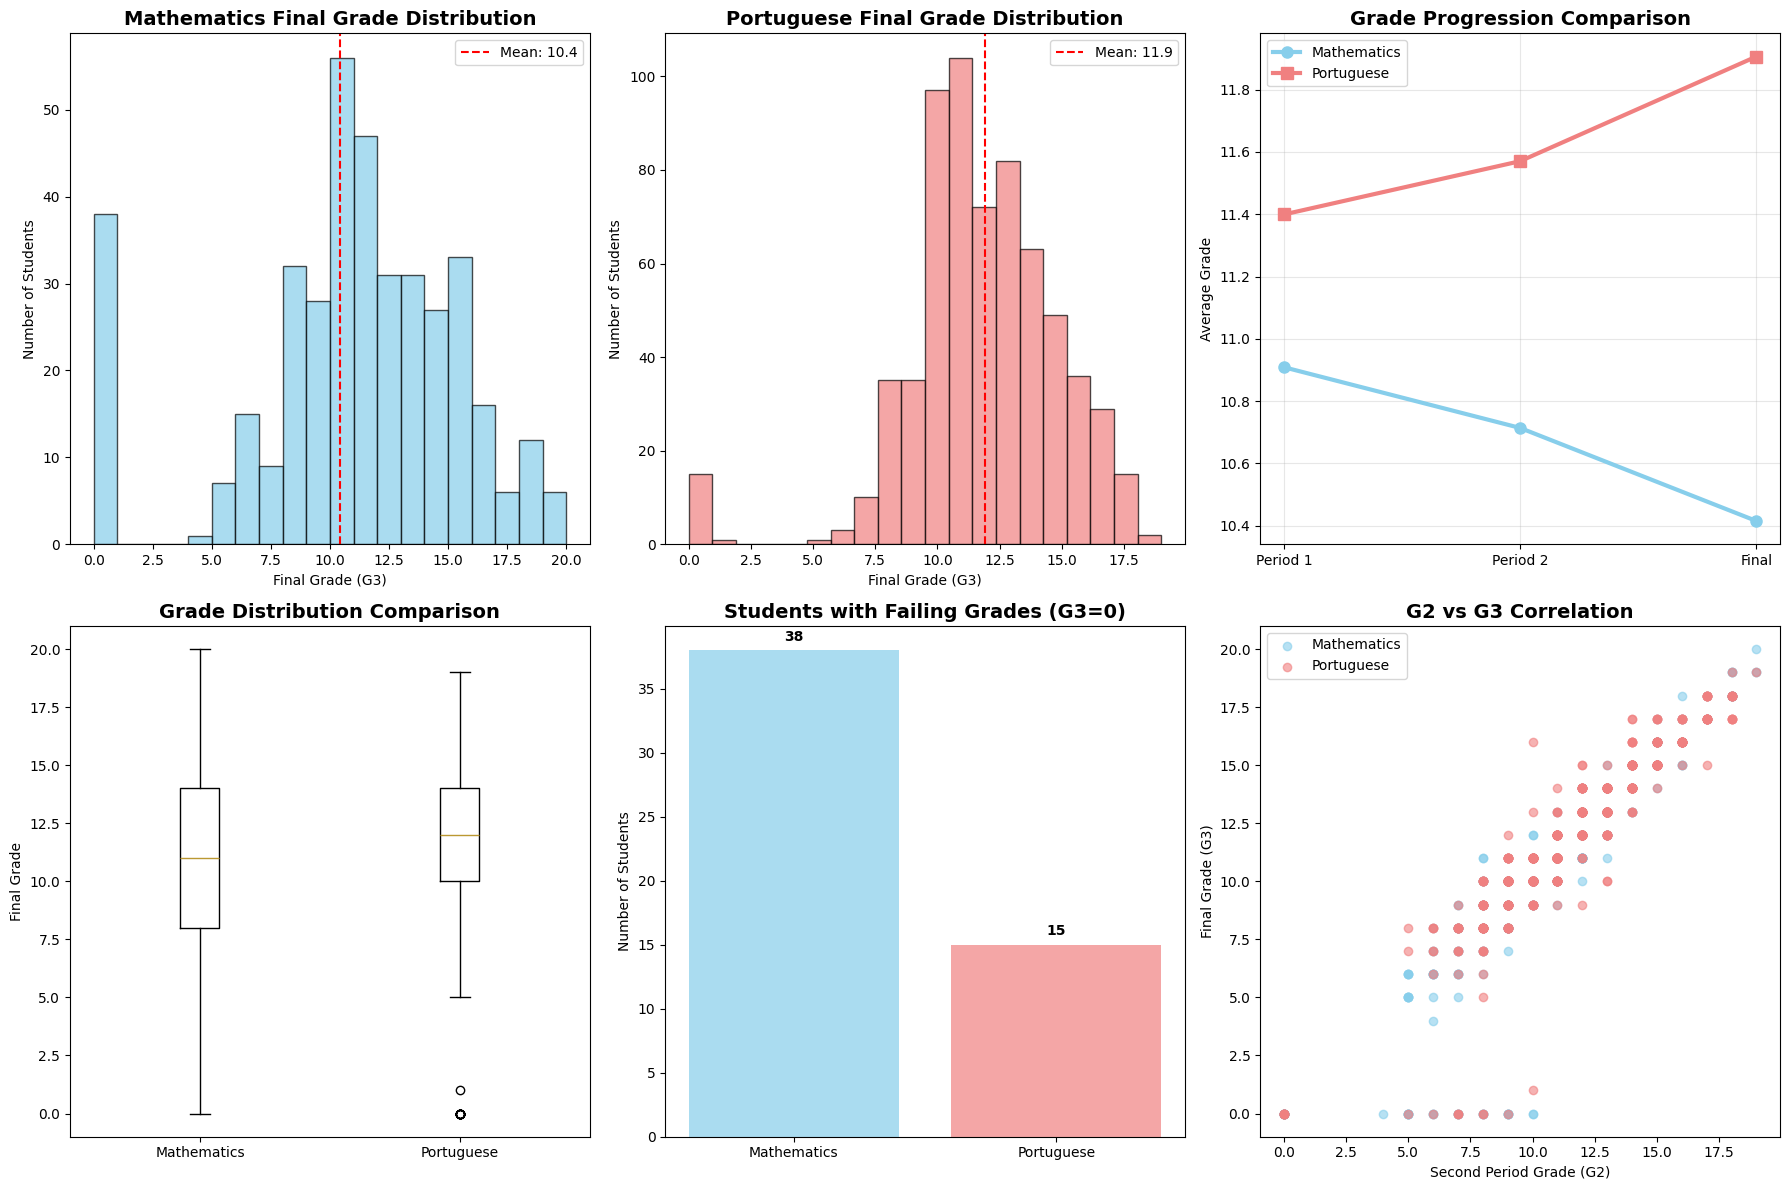

 TARGET VARIABLE ANALYSIS SUMMARY:
Mathematics - Mean: 10.42, Std: 4.58
Portuguese - Mean: 11.91, Std: 3.23
Math G2-G3 correlation: 0.905
Portuguese G2-G3 correlation: 0.919


In [100]:
# Analyze the target variable (G3 - Final Grade) for both subjects
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Mathematics Grade Analysis
axes[0, 0].hist(math_clean['G3'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Mathematics Final Grade Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Final Grade (G3)')
axes[0, 0].set_ylabel('Number of Students')
axes[0, 0].axvline(math_clean['G3'].mean(), color='red', linestyle='--', label=f'Mean: {math_clean["G3"].mean():.1f}')
axes[0, 0].legend()

# Portuguese Grade Analysis
axes[0, 1].hist(port_clean['G3'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Portuguese Final Grade Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Final Grade (G3)')
axes[0, 1].set_ylabel('Number of Students')
axes[0, 1].axvline(port_clean['G3'].mean(), color='red', linestyle='--', label=f'Mean: {port_clean["G3"].mean():.1f}')
axes[0, 1].legend()

# Grade progression comparison
math_progression = math_clean[['G1', 'G2', 'G3']].mean()
port_progression = port_clean[['G1', 'G2', 'G3']].mean()

axes[0, 2].plot(['Period 1', 'Period 2', 'Final'], math_progression, marker='o', linewidth=3,
                markersize=8, label='Mathematics', color='skyblue')
axes[0, 2].plot(['Period 1', 'Period 2', 'Final'], port_progression, marker='s', linewidth=3,
                markersize=8, label='Portuguese', color='lightcoral')
axes[0, 2].set_title('Grade Progression Comparison', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Average Grade')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Box plots for grade distribution
axes[1, 0].boxplot([math_clean['G3'], port_clean['G3']], labels=['Mathematics', 'Portuguese'])
axes[1, 0].set_title('Grade Distribution Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Final Grade')

# Students with failing grades (G3 = 0)
subjects = ['Mathematics', 'Portuguese']
failing_counts = [
    (math_clean['G3'] == 0).sum(),
    (port_clean['G3'] == 0).sum()
]

axes[1, 1].bar(subjects, failing_counts, color=['skyblue', 'lightcoral'], alpha=0.7)
axes[1, 1].set_title('Students with Failing Grades (G3=0)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Students')

# Add value labels on bars
for i, count in enumerate(failing_counts):
    axes[1, 1].text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')

# Grade correlation between periods
axes[1, 2].scatter(math_clean['G2'], math_clean['G3'], alpha=0.6, color='skyblue', label='Mathematics')
axes[1, 2].scatter(port_clean['G2'], port_clean['G3'], alpha=0.6, color='lightcoral', label='Portuguese')
axes[1, 2].set_xlabel('Second Period Grade (G2)')
axes[1, 2].set_ylabel('Final Grade (G3)')
axes[1, 2].set_title('G2 vs G3 Correlation', fontsize=14, fontweight='bold')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Print key statistics
print(" TARGET VARIABLE ANALYSIS SUMMARY:")
print("=" * 45)
print(f"Mathematics - Mean: {math_clean['G3'].mean():.2f}, Std: {math_clean['G3'].std():.2f}")
print(f"Portuguese - Mean: {port_clean['G3'].mean():.2f}, Std: {port_clean['G3'].std():.2f}")
print(f"Math G2-G3 correlation: {math_clean['G2'].corr(math_clean['G3']):.3f}")
print(f"Portuguese G2-G3 correlation: {port_clean['G2'].corr(port_clean['G3']):.3f}")

Correlation Analysis and Heatmaps

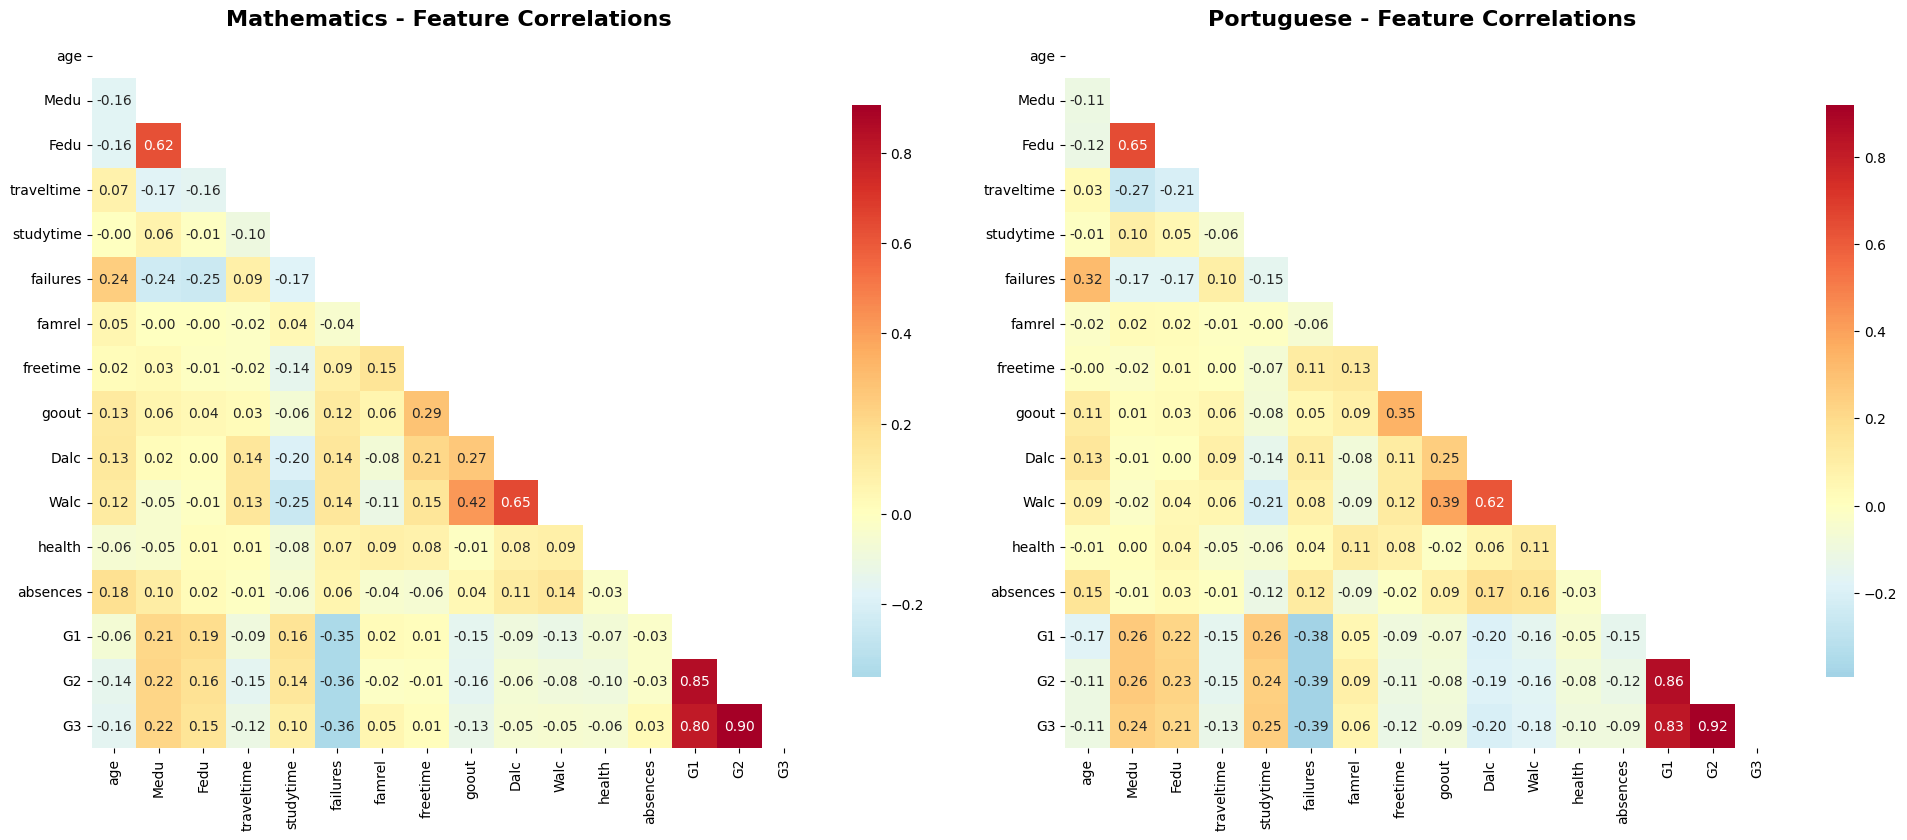

STRONGEST CORRELATIONS WITH FINAL GRADE (G3):

 MATHEMATICS:
G2              : +0.905
G1              : +0.801
failures        : -0.360
Medu            : +0.217
age             : -0.162
Fedu            : +0.152
goout           : -0.133
traveltime      : -0.117
studytime       : +0.098
health          : -0.061

 PORTUGUESE:
G2              : +0.919
G1              : +0.826
failures        : -0.393
studytime       : +0.250
Medu            : +0.240
Fedu            : +0.212
Dalc            : -0.205
Walc            : -0.177
traveltime      : -0.127
freetime        : -0.123

 HIGH CORRELATIONS (Potential Multicollinearity):
Mathematics high correlations:
G1 ↔ G2: +0.852
G1 ↔ G3: +0.801
G2 ↔ G3: +0.905

Portuguese high correlations:
G1 ↔ G2: +0.865
G1 ↔ G3: +0.826
G2 ↔ G3: +0.919


In [101]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Select numeric columns for correlation analysis
math_numeric = math_clean.select_dtypes(include=[np.number])
port_numeric = port_clean.select_dtypes(include=[np.number])

# Mathematics correlation heatmap
math_corr = math_numeric.corr()
mask_math = np.triu(np.ones_like(math_corr))  # Hide upper triangle

sns.heatmap(math_corr, mask=mask_math, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=axes[0])
axes[0].set_title('Mathematics - Feature Correlations', fontsize=16, fontweight='bold')

# Portuguese correlation heatmap
port_corr = port_numeric.corr()
mask_port = np.triu(np.ones_like(port_corr))

sns.heatmap(port_corr, mask=mask_port, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=axes[1])
axes[1].set_title('Portuguese - Feature Correlations', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Identify strongest correlations with final grade (G3)
print("STRONGEST CORRELATIONS WITH FINAL GRADE (G3):")
print("=" * 55)

print("\n MATHEMATICS:")
math_g3_corr = math_corr['G3'].abs().sort_values(ascending=False)[1:11]  # Top 10, excluding G3 itself
for feature, corr in math_g3_corr.items():
    print(f"{feature:15} : {math_corr['G3'][feature]:+.3f}")

print("\n PORTUGUESE:")
port_g3_corr = port_corr['G3'].abs().sort_values(ascending=False)[1:11]  # Top 10, excluding G3 itself
for feature, corr in port_g3_corr.items():
    print(f"{feature:15} : {port_corr['G3'][feature]:+.3f}")

# Identify highly correlated feature pairs (potential multicollinearity)
print("\n HIGH CORRELATIONS (Potential Multicollinearity):")
print("=" * 55)

def find_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })
    return high_corr_pairs

math_high_corr = find_high_correlations(math_corr)
port_high_corr = find_high_correlations(port_corr)

print("Mathematics high correlations:")
for pair in math_high_corr:
    print(f"{pair['feature1']} ↔ {pair['feature2']}: {pair['correlation']:+.3f}")

print("\nPortuguese high correlations:")
for pair in port_high_corr:
    print(f"{pair['feature1']} ↔ {pair['feature2']}: {pair['correlation']:+.3f}")

Correlation Analysis and Heatmaps

In [102]:
# Prepare features for machine learning models
def prepare_features_for_ml(df, dataset_name):
    """
    Encode categorical variables and prepare features for machine learning
    """
    print(f" PREPARING FEATURES FOR {dataset_name.upper()}:")
    print("-" * 50)

    # Create a copy for feature engineering
    df_encoded = df.copy()

    # Binary encoding for yes/no variables
    binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                   'higher', 'internet', 'romantic']

    binary_encoded = 0
    for col in binary_cols:
        if col in df_encoded.columns:
            df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})
            binary_encoded += 1

    print(f" Encoded {binary_encoded} binary (yes/no) variables")

    # Gender encoding
    if 'sex' in df_encoded.columns:
        df_encoded['sex'] = df_encoded['sex'].map({'f': 0, 'm': 1})
        print("Encoded gender: female=0, male=1")

    # Address type encoding
    if 'address' in df_encoded.columns:
        df_encoded['address'] = df_encoded['address'].map({'u': 1, 'r': 0})
        print("Encoded address: urban=1, rural=0")

    # Family size encoding
    if 'famsize' in df_encoded.columns:
        df_encoded['famsize'] = df_encoded['famsize'].map({'le3': 0, 'gt3': 1})
        print("Encoded family size: ≤3=0, >3=1")

    # Parent status encoding
    if 'Pstatus' in df_encoded.columns:
        df_encoded['Pstatus'] = df_encoded['Pstatus'].map({'t': 1, 'a': 0})
        print("Encoded parent status: together=1, apart=0")

    # Label encoding for multi-category variables
    categorical_cols = ['school', 'Mjob', 'Fjob', 'reason', 'guardian']

    label_encoded = 0
    for col in categorical_cols:
        if col in df_encoded.columns:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])
            label_encoded += 1
            print(f"Label encoded {col}: {len(le.classes_)} categories")

    print(f"Total label encoded: {label_encoded} categorical variables")

    # Remove target grades from features (we only want to predict G3)
    feature_cols = [col for col in df_encoded.columns
                   if col not in ['G1', 'G2', 'G3']]

    # Ensure all features are numeric
    X = df_encoded[feature_cols].select_dtypes(include=[np.number])
    y = df_encoded['G3']

    print(f"Final feature set: {len(X.columns)} features")
    print(f"Target variable: G3 (final grade)")
    print(f"Dataset shape: {X.shape}")

    return X, y, feature_cols

# Prepare features for both datasets
print("FEATURE PREPARATION:")
print("=" * 30)

X_math, y_math, math_feature_cols = prepare_features_for_ml(math_clean, "Mathematics")
X_port, y_port, port_feature_cols = prepare_features_for_ml(port_clean, "Portuguese")

# Display feature information
print(f"\n FEATURE SUMMARY:")
print(f"Mathematics features: {list(X_math.columns)}")
print(f"Portuguese features: {list(X_port.columns)}")

# Check for any remaining missing values
print(f"\n FINAL DATA QUALITY CHECK:")
print(f"Math missing values: {X_math.isnull().sum().sum()}")
print(f"Portuguese missing values: {X_port.isnull().sum().sum()}")

# Display feature statistics
print(f"\n FEATURE STATISTICS - MATHEMATICS:")
display(X_math.describe())

print(f"\n FEATURE STATISTICS - PORTUGUESE:")
display(X_port.describe())

FEATURE PREPARATION:
 PREPARING FEATURES FOR MATHEMATICS:
--------------------------------------------------
 Encoded 8 binary (yes/no) variables
Encoded gender: female=0, male=1
Encoded address: urban=1, rural=0
Encoded family size: ≤3=0, >3=1
Encoded parent status: together=1, apart=0
Label encoded school: 2 categories
Label encoded Mjob: 5 categories
Label encoded Fjob: 5 categories
Label encoded reason: 4 categories
Label encoded guardian: 3 categories
Total label encoded: 5 categorical variables
Final feature set: 30 features
Target variable: G3 (final grade)
Dataset shape: (395, 30)
 PREPARING FEATURES FOR PORTUGUESE:
--------------------------------------------------
 Encoded 8 binary (yes/no) variables
Encoded gender: female=0, male=1
Encoded address: urban=1, rural=0
Encoded family size: ≤3=0, >3=1
Encoded parent status: together=1, apart=0
Label encoded school: 2 categories
Label encoded Mjob: 5 categories
Label encoded Fjob: 5 categories
Label encoded reason: 4 categories
La

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.711392,0.896203,2.749367,2.521519,2.169620,2.281013,...,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000



 FEATURE STATISTICS - PORTUGUESE:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.704160,0.876733,2.514638,2.306626,1.941448,2.224961,...,0.893683,0.767334,0.368259,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,1.248317,0.863487,...,0.308481,0.422857,0.482704,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000


Model Training and Evaluation

In [90]:
# Train and evaluate multiple machine learning models
def train_and_evaluate_models(X, y, dataset_name):
    """
    Train multiple regression models and evaluate their performance
    """
    print(f" TRAINING MODELS FOR {dataset_name.upper()}:")
    print("=" * 50)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set size: {X_train.shape[0]} students")
    print(f"Testing set size: {X_test.shape[0]} students")

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
    }

    # Scale features for Linear Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n Training {name}...")

        # Use scaled features for Linear Regression, original for tree-based models
        if name == 'Linear Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            # Cross-validation with scaled features
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            # Cross-validation with original features
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

        # Calculate performance metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Store results
        results[name] = {
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse,
            'CV_Mean': cv_scores.mean(),
            'CV_Std': cv_scores.std(),
            'Predictions': y_pred,
            'Actual': y_test,
            'Model': model
        }

        # Print results
        print(f"   R² Score: {r2:.4f}")
        print(f"   MAE: {mae:.4f} points")
        print(f"   RMSE: {rmse:.4f} points")
        print(f"   CV Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    return results, X_test, y_test, scaler

# Train models for both subjects
print("MODEL TRAINING AND EVALUATION:")
print("=" * 40)

math_results, X_test_math, y_test_math, scaler_math = train_and_evaluate_models(X_math, y_math, "Mathematics")
port_results, X_test_port, y_test_port, scaler_port = train_and_evaluate_models(X_port, y_port, "Portuguese")

# Compare model performance
print(f"\n MODEL PERFORMANCE COMPARISON:")
print("=" * 40)

subjects = ['Mathematics', 'Portuguese']
all_results = [math_results, port_results]

for subject, results in zip(subjects, all_results):
    print(f"\n{subject.upper()} - Best Model Rankings (by R²):")
    sorted_models = sorted(results.items(), key=lambda x: x[1]['R²'], reverse=True)

    for i, (model_name, metrics) in enumerate(sorted_models, 1):
        print(f"{i}. {model_name:18} - R²: {metrics['R²']:.4f}, MAE: {metrics['MAE']:.4f}")

MODEL TRAINING AND EVALUATION:
 TRAINING MODELS FOR MATHEMATICS:
Training set size: 316 students
Testing set size: 79 students

 Training Linear Regression...
   R² Score: 0.0957
   MAE: 3.4948 points
   RMSE: 4.3062 points
   CV Score: 0.0077 (±0.1072)

 Training Decision Tree...
   R² Score: -0.0624
   MAE: 3.4810 points
   RMSE: 4.6674 points
   CV Score: -0.3751 (±0.3701)

 Training Random Forest...
   R² Score: 0.3349
   MAE: 2.9551 points
   RMSE: 3.6929 points
   CV Score: 0.2823 (±0.0650)
 TRAINING MODELS FOR PORTUGUESE:
Training set size: 519 students
Testing set size: 130 students

 Training Linear Regression...
   R² Score: 0.1719
   MAE: 2.1110 points
   RMSE: 2.8418 points
   CV Score: 0.2735 (±0.0640)

 Training Decision Tree...
   R² Score: -0.4562
   MAE: 2.7846 points
   RMSE: 3.7683 points
   CV Score: -0.6226 (±0.4280)

 Training Random Forest...
   R² Score: 0.1659
   MAE: 2.0661 points
   RMSE: 2.8519 points
   CV Score: 0.2764 (±0.0955)

 MODEL PERFORMANCE COMPARI

Model Performance Visualization

VISUALIZING MODEL PERFORMANCE:


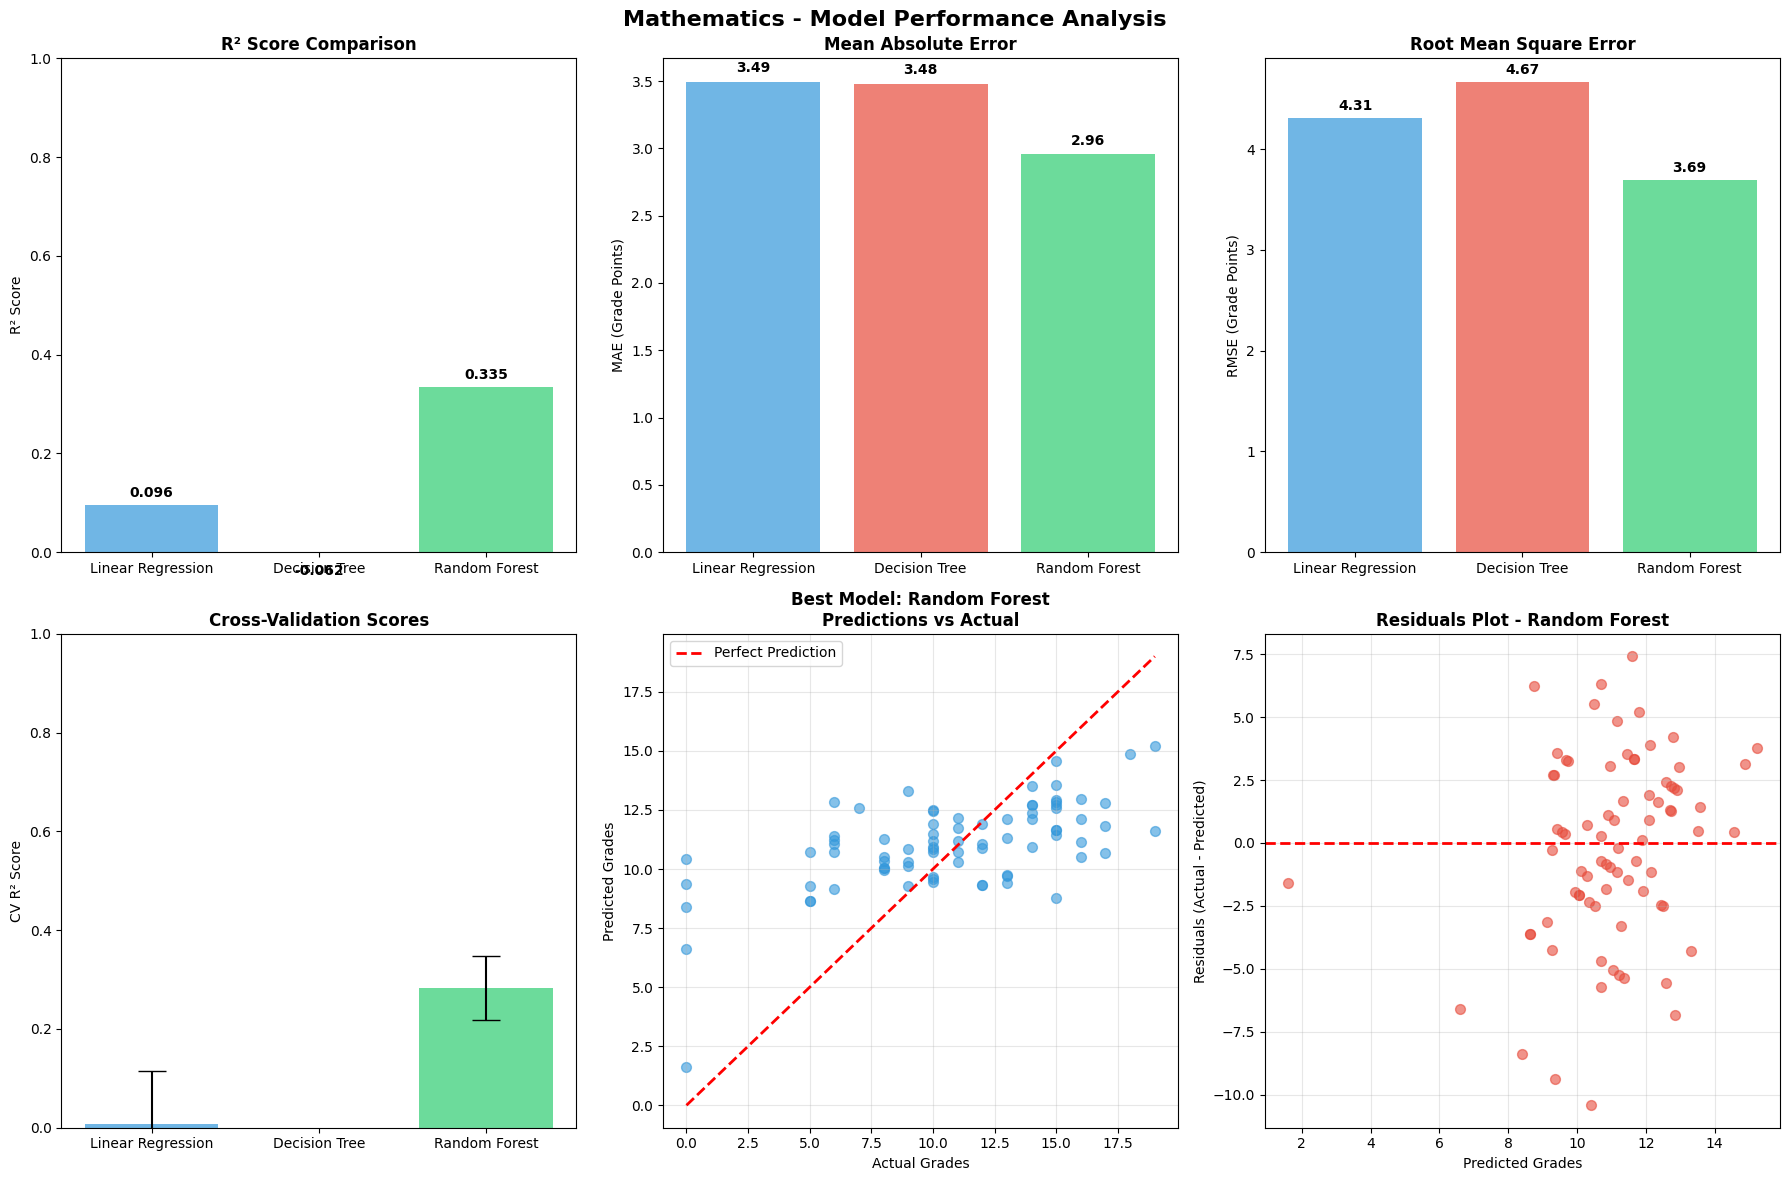

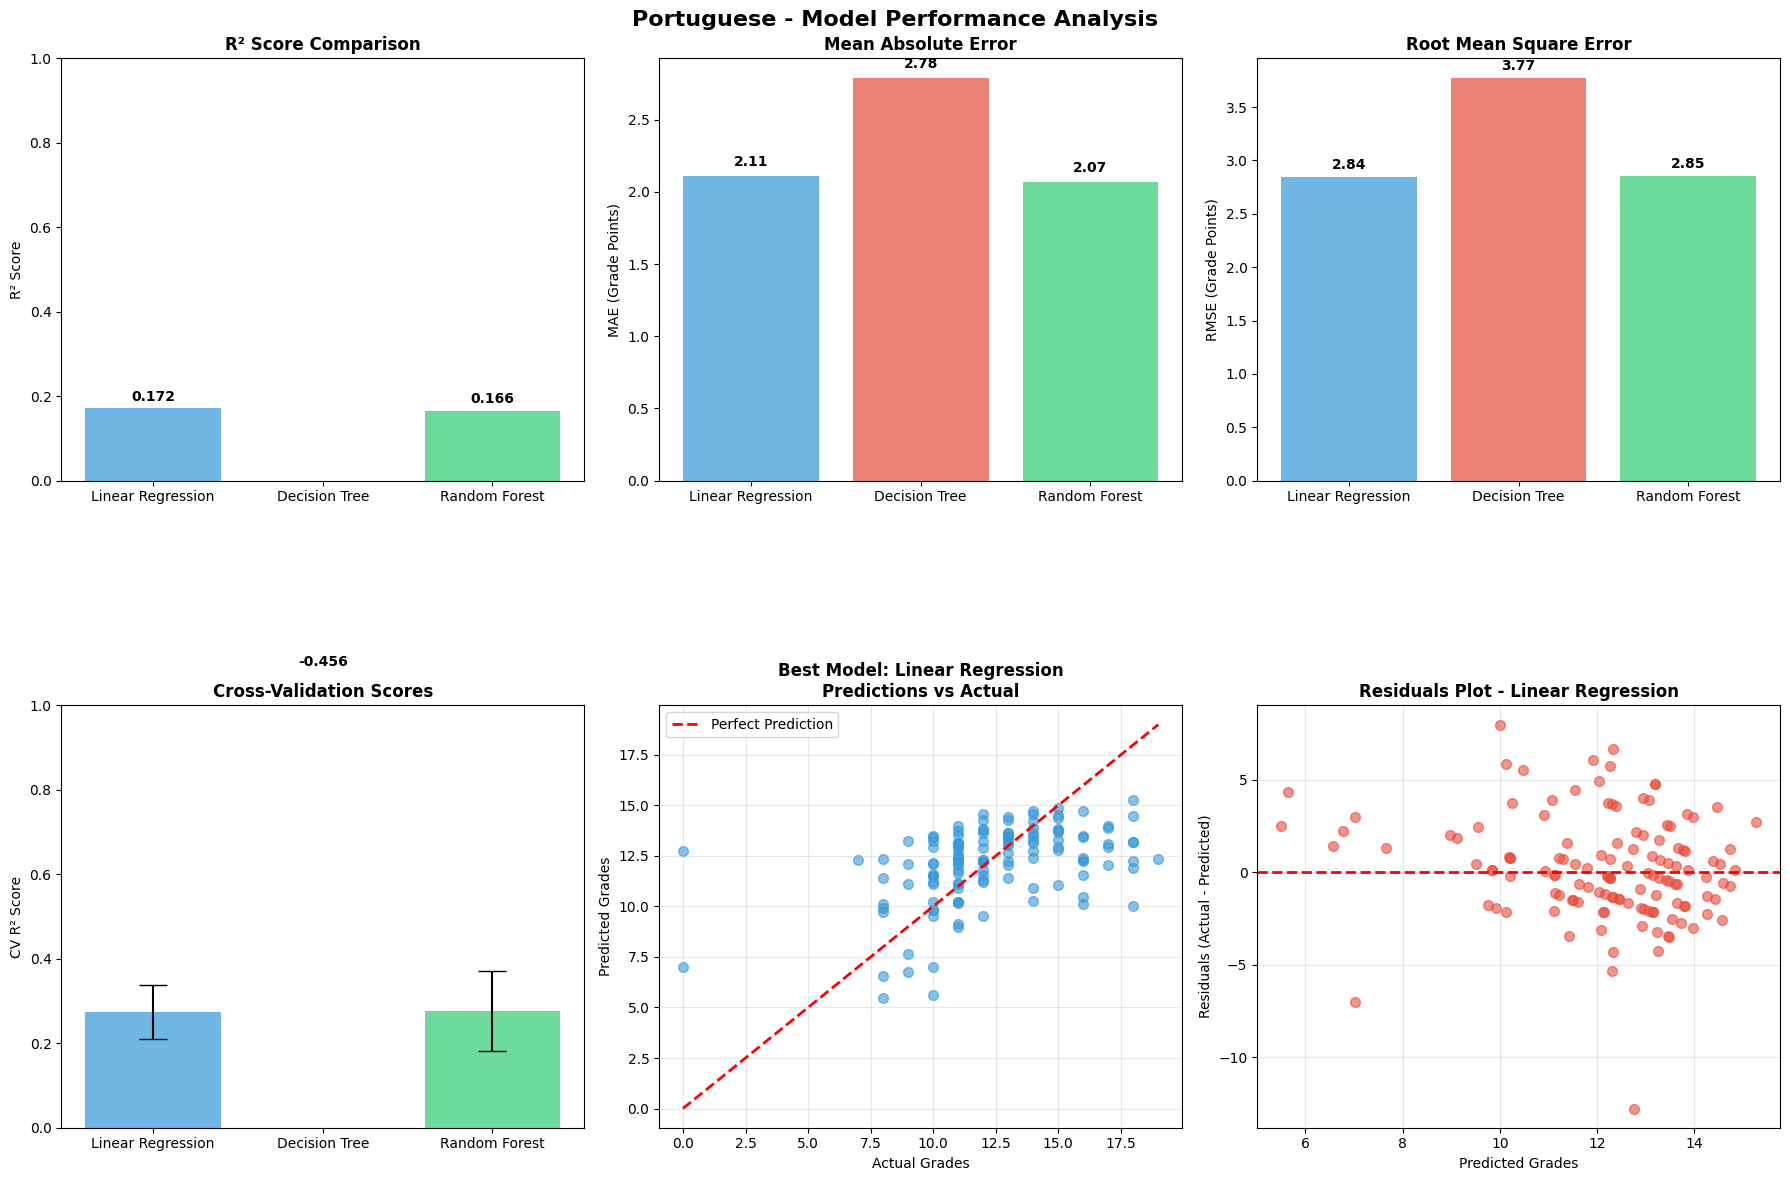


 BEST MODELS:
Mathematics: Random Forest (R² = 0.3349)
Portuguese: Linear Regression (R² = 0.1719)


In [91]:
# Create comprehensive visualizations of model performance
def visualize_model_performance(results, dataset_name):

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'{dataset_name} - Model Performance Analysis', fontsize=16, fontweight='bold')

    # Extract model names and metrics
    models = list(results.keys())
    r2_scores = [results[model]['R²'] for model in models]
    mae_scores = [results[model]['MAE'] for model in models]
    rmse_scores = [results[model]['RMSE'] for model in models]
    cv_means = [results[model]['CV_Mean'] for model in models]
    cv_stds = [results[model]['CV_Std'] for model in models]

    colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green

    # 1. R² Score Comparison
    bars1 = axes[0, 0].bar(models, r2_scores, color=colors, alpha=0.7)
    axes[0, 0].set_title('R² Score Comparison', fontweight='bold')
    axes[0, 0].set_ylabel('R² Score')
    axes[0, 0].set_ylim(0, 1)

    # Add value labels on bars
    for bar, score in zip(bars1, r2_scores):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

    # 2. MAE Comparison
    bars2 = axes[0, 1].bar(models, mae_scores, color=colors, alpha=0.7)
    axes[0, 1].set_title('Mean Absolute Error', fontweight='bold')
    axes[0, 1].set_ylabel('MAE (Grade Points)')

    for bar, score in zip(bars2, mae_scores):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                       f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

    # 3. RMSE Comparison
    bars3 = axes[0, 2].bar(models, rmse_scores, color=colors, alpha=0.7)
    axes[0, 2].set_title('Root Mean Square Error', fontweight='bold')
    axes[0, 2].set_ylabel('RMSE (Grade Points)')

    for bar, score in zip(bars3, rmse_scores):
        axes[0, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                       f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

    # 4. Cross-Validation Scores with Error Bars
    axes[1, 0].bar(models, cv_means, yerr=cv_stds, color=colors, alpha=0.7, capsize=10)
    axes[1, 0].set_title('Cross-Validation Scores', fontweight='bold')
    axes[1, 0].set_ylabel('CV R² Score')
    axes[1, 0].set_ylim(0, 1)

    # 5. Prediction vs Actual (Best Model)
    best_model = max(results.keys(), key=lambda x: results[x]['R²'])
    y_actual = results[best_model]['Actual']
    y_pred = results[best_model]['Predictions']

    axes[1, 1].scatter(y_actual, y_pred, alpha=0.6, color=colors[0], s=50)
    axes[1, 1].plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()],
                   'r--', lw=2, label='Perfect Prediction')
    axes[1, 1].set_xlabel('Actual Grades')
    axes[1, 1].set_ylabel('Predicted Grades')
    axes[1, 1].set_title(f'Best Model: {best_model}\nPredictions vs Actual', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # 6. Residuals Plot (Best Model)
    residuals = y_actual - y_pred
    axes[1, 2].scatter(y_pred, residuals, alpha=0.6, color=colors[1], s=50)
    axes[1, 2].axhline(y=0, color='red', linestyle='--', lw=2)
    axes[1, 2].set_xlabel('Predicted Grades')
    axes[1, 2].set_ylabel('Residuals (Actual - Predicted)')
    axes[1, 2].set_title(f'Residuals Plot - {best_model}', fontweight='bold')
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return best_model

# Visualize results for both subjects
print("VISUALIZING MODEL PERFORMANCE:")
print("=" * 40)

best_math_model = visualize_model_performance(math_results, "Mathematics")
best_port_model = visualize_model_performance(port_results, "Portuguese")

print(f"\n BEST MODELS:")
print(f"Mathematics: {best_math_model} (R² = {math_results[best_math_model]['R²']:.4f})")
print(f"Portuguese: {best_port_model} (R² = {port_results[best_port_model]['R²']:.4f})")


Feature Importance Analysis

FEATURE IMPORTANCE ANALYSIS - MATHEMATICS:
Top 10 Most Important Features:


,Feature,Importance
29,absences,0.193777
14,failures,0.141688
28,health,0.053617
25,goout,0.051369
2,age,0.043298
13,studytime,0.034933
8,Mjob,0.034754
9,Fjob,0.033212
24,freetime,0.032393
7,Fedu,0.029959


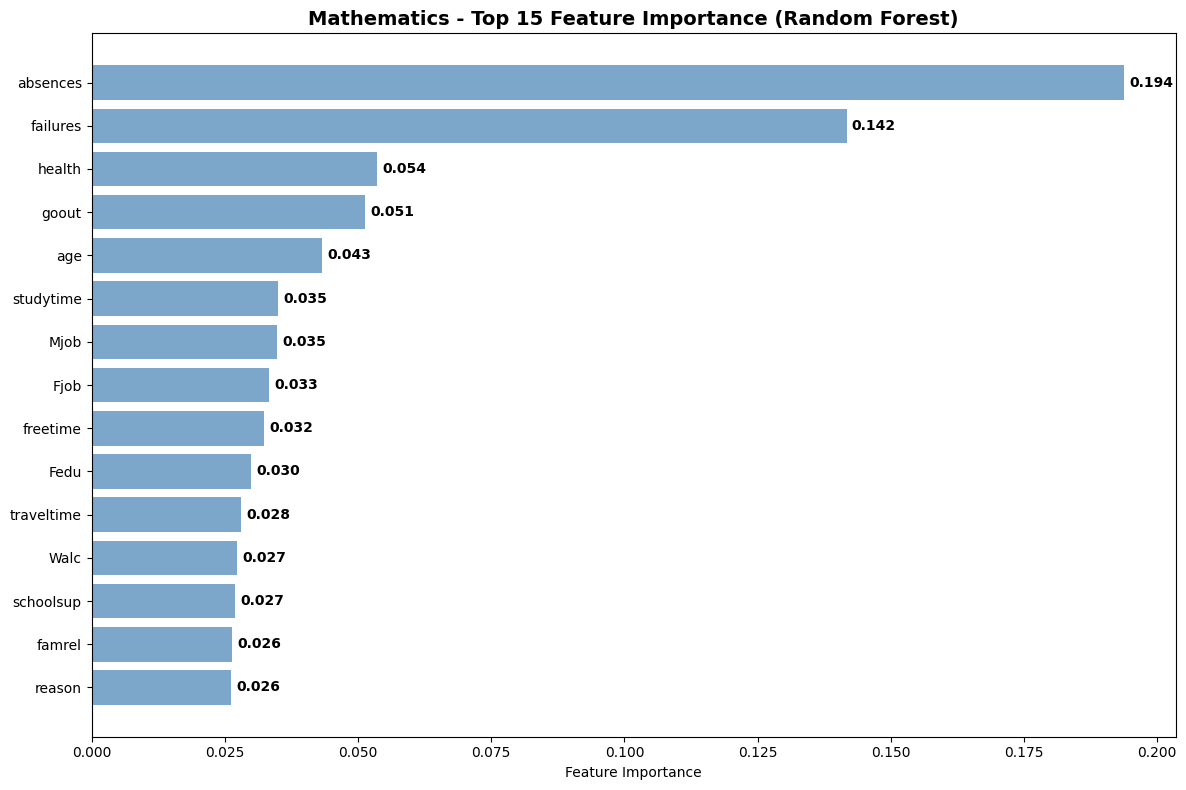


 KEY INSIGHTS:
• Top 3 predictive features: absences, failures, health
• 15 features explain 80% of the model's decisions
FEATURE IMPORTANCE ANALYSIS - PORTUGUESE:
Top 10 Most Important Features:


,Feature,Importance
14,failures,0.206040
29,absences,0.071119
0,school,0.049785
7,Fedu,0.049621
27,Walc,0.043723
26,Dalc,0.043550
24,freetime,0.040302
2,age,0.037598
28,health,0.035406
25,goout,0.034820


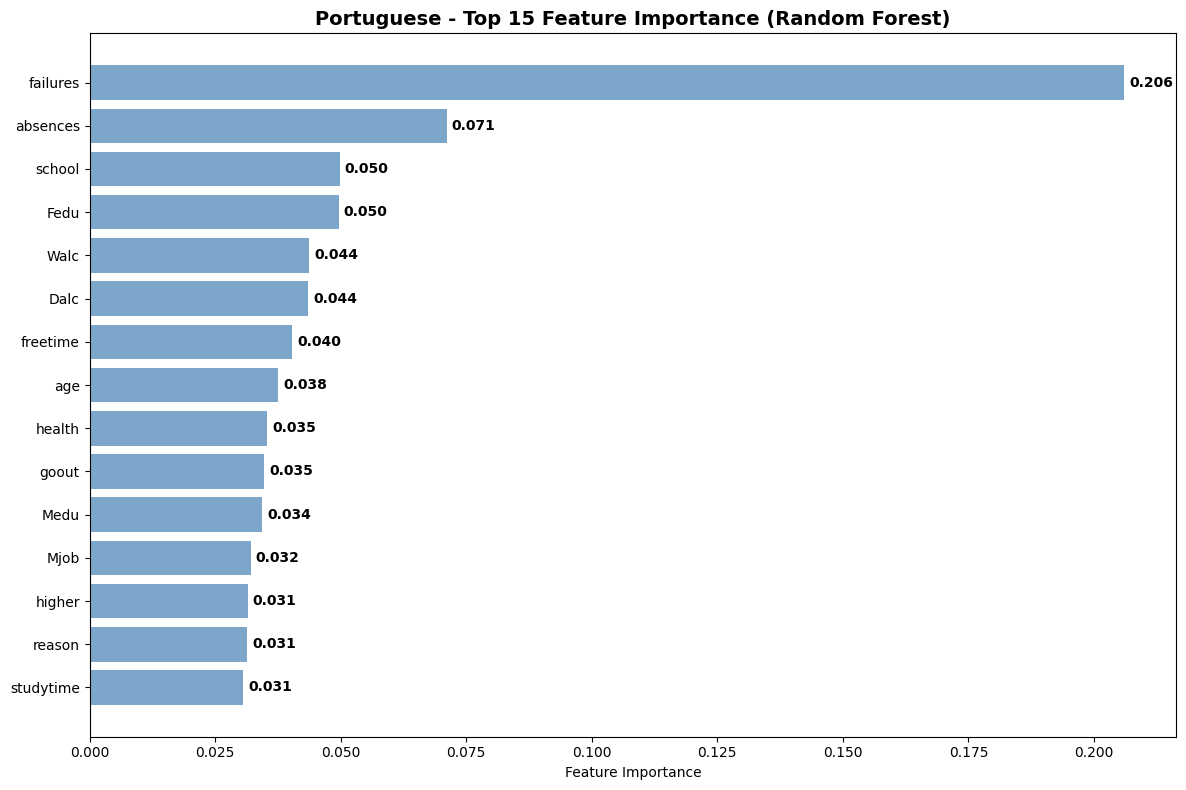


 KEY INSIGHTS:
• Top 3 predictive features: failures, absences, school
• 16 features explain 80% of the model's decisions

 FEATURE IMPORTANCE COMPARISON:
Common important features: 7
   • goout: Math rank #26, Portuguese rank #26
   • failures: Math rank #15, Portuguese rank #15
   • freetime: Math rank #25, Portuguese rank #25
   • age: Math rank #3, Portuguese rank #3
   • Fedu: Math rank #8, Portuguese rank #8
   • health: Math rank #29, Portuguese rank #29
   • absences: Math rank #30, Portuguese rank #30

 Math-specific important features: 3
   • Mjob
   • studytime
   • Fjob

 Portuguese-specific important features: 3
   • Walc
   • Dalc
   • school


In [92]:
# Analyze feature importance for tree-based models
def analyze_feature_importance(results, X, dataset_name):

    print(f"FEATURE IMPORTANCE ANALYSIS - {dataset_name.upper()}:")
    print("=" * 55)

    # Focus on Random Forest as it generally provides reliable feature importance
    if 'Random Forest' in results:
        rf_model = results['Random Forest']['Model']
        feature_importance = rf_model.feature_importances_
        feature_names = X.columns

        # Create importance dataframe
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importance
        }).sort_values('Importance', ascending=False)

        print("Top 10 Most Important Features:")
        display(importance_df.head(10))

        # Visualize feature importance
        plt.figure(figsize=(12, 8))

        # Top 15 features
        top_features = importance_df.head(15)

        bars = plt.barh(range(len(top_features)), top_features['Importance'],
                       color='steelblue', alpha=0.7)
        plt.yticks(range(len(top_features)), top_features['Feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'{dataset_name} - Top 15 Feature Importance (Random Forest)',
                 fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()  # Highest importance at top

        # Add value labels
        for i, (bar, importance) in enumerate(zip(bars, top_features['Importance'])):
            plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                    f'{importance:.3f}', va='center', fontweight='bold')

        plt.tight_layout()
        plt.show()

        # Feature importance insights
        print(f"\n KEY INSIGHTS:")
        top_3_features = importance_df.head(3)['Feature'].tolist()
        print(f"• Top 3 predictive features: {', '.join(top_3_features)}")

        # Calculate cumulative importance
        cumulative_importance = importance_df['Importance'].cumsum()
        features_80_percent = len(cumulative_importance[cumulative_importance <= 0.8])
        print(f"• {features_80_percent} features explain 80% of the model's decisions")

        return importance_df

    else:
        print("Random Forest model not available for feature importance analysis")
        return None

# Analyze feature importance for both subjects
math_importance = analyze_feature_importance(math_results, X_math, "Mathematics")
port_importance = analyze_feature_importance(port_results, X_port, "Portuguese")

# Compare feature importance between subjects
if math_importance is not None and port_importance is not None:
    print(f"\n FEATURE IMPORTANCE COMPARISON:")
    print("=" * 40)

    # Get top 10 features for each subject
    math_top_10 = set(math_importance.head(10)['Feature'])
    port_top_10 = set(port_importance.head(10)['Feature'])

    common_features = math_top_10.intersection(port_top_10)
    math_unique = math_top_10 - common_features
    port_unique = port_top_10 - common_features

    print(f"Common important features: {len(common_features)}")
    for feature in common_features:
        math_rank = math_importance[math_importance['Feature'] == feature].index[0] + 1
        port_rank = port_importance[port_importance['Feature'] == feature].index[0] + 1
        print(f"   • {feature}: Math rank #{math_rank}, Portuguese rank #{port_rank}")

    print(f"\n Math-specific important features: {len(math_unique)}")
    for feature in math_unique:
        print(f"   • {feature}")

    print(f"\n Portuguese-specific important features: {len(port_unique)}")
    for feature in port_unique:
        print(f"   • {feature}")

Hyperparameter Tuning

In [93]:
# Perform hyperparameter tuning for the best models
def hyperparameter_tuning(X, y, dataset_name):
    """Perform hyperparameter tuning using GridSearchCV"""

    print(f"HYPERPARAMETER TUNING - {dataset_name.upper()}:")
    print("=" * 50)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest Hyperparameter Tuning
    print("Tuning Random Forest hyperparameters...")

    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }

    rf = RandomForestRegressor(random_state=42)
    rf_grid = GridSearchCV(
        rf, rf_param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    rf_grid.fit(X_train, y_train)
    best_rf = rf_grid.best_estimator_
    rf_pred = best_rf.predict(X_test)
    rf_r2 = r2_score(y_test, rf_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

    print(f"Random Forest - Best parameters: {rf_grid.best_params_}")
    print(f"Best CV score: {rf_grid.best_score_:.4f}")
    print(f"Test R²: {rf_r2:.4f}")
    print(f"Test MAE: {rf_mae:.4f}")
    print(f"Test RMSE: {rf_rmse:.4f}")

    # Decision Tree Hyperparameter Tuning
    print(f"\n Tuning Decision Tree hyperparameters...")

    dt_param_grid = {
        'max_depth': [None, 5, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': [None, 'auto', 'sqrt']
    }

    dt = DecisionTreeRegressor(random_state=42)
    dt_grid = GridSearchCV(
        dt, dt_param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    dt_grid.fit(X_train, y_train)

    # Get best Decision Tree model
    best_dt = dt_grid.best_estimator_
    dt_pred = best_dt.predict(X_test)
    dt_r2 = r2_score(y_test, dt_pred)
    dt_mae = mean_absolute_error(y_test, dt_pred)
    dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

    print(f" Decision Tree - Best parameters: {dt_grid.best_params_}")
    print(f"   Best CV score: {dt_grid.best_score_:.4f}")
    print(f"   Test R²: {dt_r2:.4f}")
    print(f"   Test MAE: {dt_mae:.4f}")
    print(f"   Test RMSE: {dt_rmse:.4f}")

    # Compare with baseline models
    print(f"\n IMPROVEMENT SUMMARY:")
    print("-" * 30)

    return {
        'Random Forest': {
            'model': best_rf,
            'params': rf_grid.best_params_,
            'R²': rf_r2,
            'MAE': rf_mae,
            'RMSE': rf_rmse,
            'CV_score': rf_grid.best_score_
        },
        'Decision Tree': {
            'model': best_dt,
            'params': dt_grid.best_params_,
            'R²': dt_r2,
            'MAE': dt_mae,
            'RMSE': dt_rmse,
            'CV_score': dt_grid.best_score_
        }
    }

# Perform hyperparameter tuning for both subjects
print("HYPERPARAMETER OPTIMIZATION:")
print("=" * 40)

tuned_math_results = hyperparameter_tuning(X_math, y_math, "Mathematics")
tuned_port_results = hyperparameter_tuning(X_port, y_port, "Portuguese")

# Compare original vs tuned models
print(f"\n PERFORMANCE IMPROVEMENT:")
print("=" * 35)

print(f"\nMATHEMATICS:")
print(f"Original Random Forest R²: {math_results['Random Forest']['R²']:.4f}")
print(f"Tuned Random Forest R²:    {tuned_math_results['Random Forest']['R²']:.4f}")
print(f"Improvement: {tuned_math_results['Random Forest']['R²'] - math_results['Random Forest']['R²']:+.4f}")

print(f"\nPORTUGUESE:")
print(f"Original Random Forest R²: {port_results['Random Forest']['R²']:.4f}")
print(f"Tuned Random Forest R²:    {tuned_port_results['Random Forest']['R²']:.4f}")
print(f"Improvement: {tuned_port_results['Random Forest']['R²'] - port_results['Random Forest']['R²']:+.4f}")

HYPERPARAMETER OPTIMIZATION:
HYPERPARAMETER TUNING - MATHEMATICS:
Tuning Random Forest hyperparameters...
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Random Forest - Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best CV score: 0.2533
Test R²: 0.1837
Test MAE: 3.3611
Test RMSE: 4.0913

 Tuning Decision Tree hyperparameters...
Fitting 3 folds for each of 288 candidates, totalling 864 fits
 Decision Tree - Best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
   Best CV score: 0.1617
   Test R²: 0.0195
   Test MAE: 3.4799
   Test RMSE: 4.4839

 IMPROVEMENT SUMMARY:
------------------------------
HYPERPARAMETER TUNING - PORTUGUESE:
Tuning Random Forest hyperparameters...
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Random Forest - Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_s

Model Validation and Final Evaluation

 COMPREHENSIVE MODEL VALIDATION:
🎯 FINAL MODEL EVALUATION - MATHEMATICS:
Best Model: Random Forest
R² Score: 0.1837
MAE: 3.3611 points
RMSE: 4.0913 points

 ROBUSTNESS TESTING (Multiple Random States):
--------------------------------------------------
R² Score - Mean: 0.2020 (±0.0802)
MAE - Mean: 2.9949 (±0.2709)
RMSE - Mean: 4.0225 (±0.3886)

 LEARNING CURVE ANALYSIS:
-----------------------------------


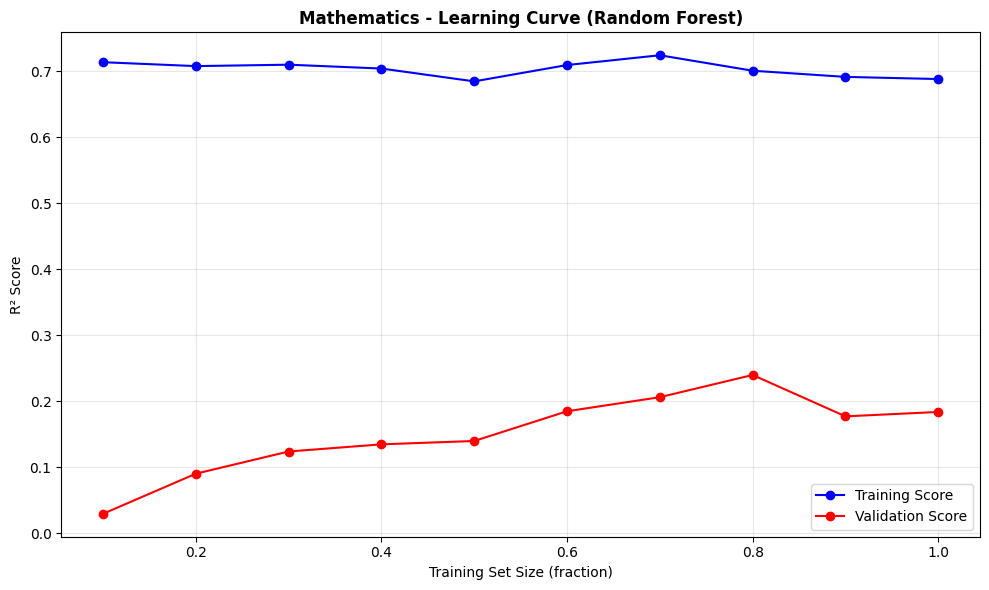


 PERFORMANCE BY GRADE RANGE:
----------------------------------------
Failing (0-5)      - Count:  9, MAE: 6.797, R²: -7.702472386493538
Low (6-10)         - Count: 29, MAE: 2.479, R²: -2.9850243447212885
Medium (11-15)     - Count: 31, MAE: 2.531, R²: -2.939367703459736
High (16-20)       - Count: 10, MAE: 5.401, R²: -22.766037360233142
🎯 FINAL MODEL EVALUATION - PORTUGUESE:
Best Model: Random Forest
R² Score: 0.2158
MAE: 2.0091 points
RMSE: 2.7653 points

 ROBUSTNESS TESTING (Multiple Random States):
--------------------------------------------------
R² Score - Mean: 0.2803 (±0.0779)
MAE - Mean: 1.9220 (±0.0946)
RMSE - Mean: 2.7033 (±0.2316)

 LEARNING CURVE ANALYSIS:
-----------------------------------


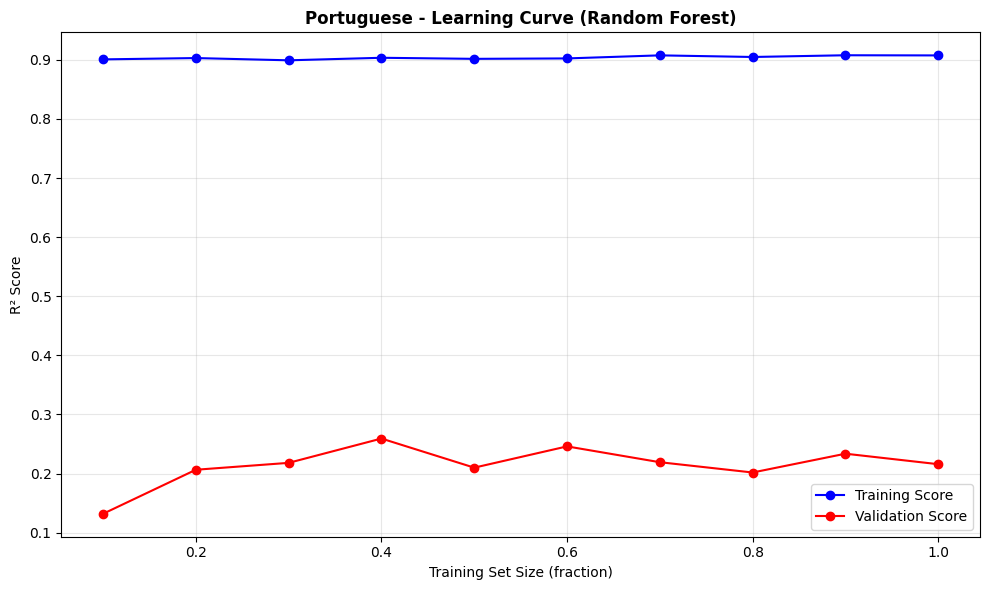


 PERFORMANCE BY GRADE RANGE:
----------------------------------------
Failing (0-5)      - Count:  2, MAE: 10.170, R²: 0.0
Low (6-10)         - Count: 30, MAE: 1.847, R²: -5.379535881121134
Medium (11-15)     - Count: 76, MAE: 1.193, R²: -0.10224215629149658
High (16-20)       - Count: 22, MAE: 4.308, R²: -21.364502586805557


In [94]:
# Comprehensive model validation and final evaluation
def final_model_evaluation(original_results, tuned_results, X, y, dataset_name):

    print(f"🎯 FINAL MODEL EVALUATION - {dataset_name.upper()}:")
    print("=" * 55)

    # Get the best tuned model
    best_tuned_model_name = max(tuned_results.keys(), key=lambda x: tuned_results[x]['R²'])
    best_tuned_model = tuned_results[best_tuned_model_name]['model']

    print(f"Best Model: {best_tuned_model_name}")
    print(f"R² Score: {tuned_results[best_tuned_model_name]['R²']:.4f}")
    print(f"MAE: {tuned_results[best_tuned_model_name]['MAE']:.4f} points")
    print(f"RMSE: {tuned_results[best_tuned_model_name]['RMSE']:.4f} points")

    # Perform additional validation with different random states
    print(f"\n ROBUSTNESS TESTING (Multiple Random States):")
    print("-" * 50)

    r2_scores = []
    mae_scores = []
    rmse_scores = []

    # Test with 10 different random states
    for random_state in range(10, 20):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state
        )

        # Clone and retrain the best model
        model_clone = best_tuned_model.__class__(**best_tuned_model.get_params())
        model_clone.fit(X_train, y_train)
        y_pred = model_clone.predict(X_test)

        r2_scores.append(r2_score(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    print(f"R² Score - Mean: {np.mean(r2_scores):.4f} (±{np.std(r2_scores):.4f})")
    print(f"MAE - Mean: {np.mean(mae_scores):.4f} (±{np.std(mae_scores):.4f})")
    print(f"RMSE - Mean: {np.mean(rmse_scores):.4f} (±{np.std(rmse_scores):.4f})")

    # Learning curve analysis
    print(f"\n LEARNING CURVE ANALYSIS:")
    print("-" * 35)

    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    val_scores = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for train_size in train_sizes:
        n_samples = int(train_size * len(X_train))

        # Train on subset
        model_subset = best_tuned_model.__class__(**best_tuned_model.get_params())
        model_subset.fit(X_train[:n_samples], y_train[:n_samples])

        # Evaluate on training subset and validation set
        train_pred = model_subset.predict(X_train[:n_samples])
        val_pred = model_subset.predict(X_test)

        train_scores.append(r2_score(y_train[:n_samples], train_pred))
        val_scores.append(r2_score(y_test, val_pred))

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, val_scores, 'o-', color='red', label='Validation Score')
    plt.xlabel('Training Set Size (fraction)')
    plt.ylabel('R² Score')
    plt.title(f'{dataset_name} - Learning Curve ({best_tuned_model_name})', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Performance by grade range
    print(f"\n PERFORMANCE BY GRADE RANGE:")
    print("-" * 40)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    best_tuned_model.fit(X_train, y_train)
    y_pred = best_tuned_model.predict(X_test)

    # Create grade ranges
    grade_ranges = [
        (0, 5, "Failing (0-5)"),
        (6, 10, "Low (6-10)"),
        (11, 15, "Medium (11-15)"),
        (16, 20, "High (16-20)")
    ]

    for min_grade, max_grade, range_name in grade_ranges:
        mask = (y_test >= min_grade) & (y_test <= max_grade)
        if mask.sum() > 0:
            range_mae = mean_absolute_error(y_test[mask], y_pred[mask])
            range_r2 = r2_score(y_test[mask], y_pred[mask]) if mask.sum() > 1 else "N/A"
            print(f"{range_name:18} - Count: {mask.sum():2d}, MAE: {range_mae:.3f}, R²: {range_r2}")

    return {
        'best_model': best_tuned_model,
        'model_name': best_tuned_model_name,
        'robustness_r2': (np.mean(r2_scores), np.std(r2_scores)),
        'robustness_mae': (np.mean(mae_scores), np.std(mae_scores)),
        'learning_curve': (train_sizes, train_scores, val_scores)
    }

# Final evaluation for both subjects
print(" COMPREHENSIVE MODEL VALIDATION:")
print("=" * 45)

final_math_eval = final_model_evaluation(math_results, tuned_math_results, X_math, y_math, "Mathematics")
final_port_eval = final_model_evaluation(port_results, tuned_port_results, X_port, y_port, "Portuguese")